<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Библиотеки" data-toc-modified-id="Библиотеки-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Библиотеки</a></span></li></ul></li><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span><ul class="toc-item"><li><span><a href="#Описание-игры" data-toc-modified-id="Описание-игры-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание игры</a></span></li><li><span><a href="#Идея" data-toc-modified-id="Идея-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Идея</a></span></li></ul></li><li><span><a href="#Исследование" data-toc-modified-id="Исследование-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование</a></span><ul class="toc-item"><li><span><a href="#Загрузка" data-toc-modified-id="Загрузка-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Буквы" data-toc-modified-id="Буквы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Буквы</a></span></li><li><span><a href="#Слова-с-уникальными-буквами" data-toc-modified-id="Слова-с-уникальными-буквами-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Слова с уникальными буквами</a></span></li><li><span><a href="#Обработка" data-toc-modified-id="Обработка-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Обработка</a></span></li><li><span><a href="#Основной-код-обработки" data-toc-modified-id="Основной-код-обработки-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Основной код обработки</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Библиотеки

In [1]:
import pandas as pd
from PIL import Image

# Введение

## Описание игры

[Wordle](https://ru.wikipedia.org/wiki/Wordle "Ссылка на википедию") — браузерная игра в слова, разработанная Джошем Уордлом, программистом, ранее создавшим социальные эксперименты Place и The Button для Reddit.


**Игровой процесс:**

Случайно выбирается слово из пяти букв, которое игроки должны угадать за шесть попыток. После каждого предположения буквы отмечаются зелёным, жёлтым или серым цветом; зелёный означает, что буква правильная и находится в правильном месте, жёлтый означает, что буква есть в ответе, но на другой позиции, а серый означает, что буквы в загаданном слове нет вообще.

Концептуально и стилистически игра похожа на настольную игру Jotto 1955 года и на франшизу игрового шоу Lingo.

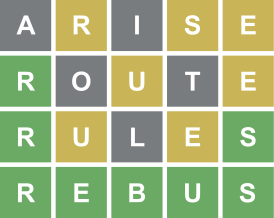

In [2]:
Image.open('Wordle_196_example.svg.png')

## Идея

Играем в русскую версию под названием `"5 слов"`

- В русском языке 33 буквы.
- У нас есть 6 попыток на 5 букв.
- 6-я попытка должа быть победная.

Значит мы должны за 5 попыток перебрать 25 букв и желательно наиболее частые среди 5-буквенных слов, чтобы с наибольшей вероятностью собрать буквы, содержащиеся в загаданном слове.

Можно подобрать набор из 5 слов, содержащих неповторяющиеся 25 букв, наиблее частых среди 5-буквенных слов.

Погнали...

# Исследование

In [3]:
def search_letters(filename):
    with open(filename) as file:
        file.readline()
        text = file.read().replace('\n', '')
    letters = set(text)
    print(f'В корпусе \x1b[47m\x1b[1m {len(letters)} \x1b[0m уникальных букв:')
    print(*sorted(letters))

Найдем в интернете корпус русских слов

In [4]:
file = 'russian_nouns.txt'

In [5]:
words = pd.read_csv(file)

In [6]:
words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51301 entries, 0 to 51300
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    51301 non-null  object
dtypes: object(1)
memory usage: 400.9+ KB


In [7]:
search_letters(file)

В корпусе  34  уникальных букв:
- а б в г д е ж з и й к л м н о п р с т у ф х ц ч ш щ ъ ы ь э ю я ё


Как видим в найденом корпусе **51301** слов и **34!** уникальных букв: в буквы затесался дефис.

Также в наборе различаются буквы `е` и `ё`.

Заменим все буквы `ё` на `е`.

In [8]:
file = 'russian_nouns_e.txt'

In [9]:
words = pd.read_csv(file)

In [10]:
words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51301 entries, 0 to 51300
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    51301 non-null  object
dtypes: object(1)
memory usage: 400.9+ KB


In [11]:
search_letters(file)

В корпусе  33  уникальных букв:
- а б в г д е ж з и й к л м н о п р с т у ф х ц ч ш щ ъ ы ь э ю я


Итого: имеем корпус из **51301** слов с **33** уникальными буквами в дефисом в тои числе.

## Загрузка

Загрузим слова в датафрейм:

In [12]:
words = pd.read_csv('russian_nouns_e.txt')

Добавим длину слова:

In [13]:
words['len'] = words['word'].apply(lambda x: len(x))

Взлянем на результат:

In [14]:
words

,word,len
0,абажур,6
1,абажурчик,9
2,абаз,4
3,абазин,6
4,абазинец,8
...,...,...
51296,ящик,4
51297,ящичек,6
51298,ящичник,7
51299,ящур,4


## Подготовка

Оставим только слова длиной 5 букв:

In [15]:
words_5 = words.query('len == 5').reset_index(drop=True)

In [16]:
words_5.head()

,word,len
0,абака,5
1,аббат,5
2,абвер,5
3,абзац,5
4,аборт,5


Найдем слова, содержащие дефис:

In [17]:
words_5[words_5['word'].str.count('-') > 0]

,word,len
3144,хи-хи,5


Всего одно слово. Удалим его, поскольку в игре не используется дфевис.

In [18]:
words_5 = words_5[words_5['word'].str.count('-') == 0]

Добавим в датафрейм буквы

In [19]:
for i in range(5):
    words_5[f'l{i+1}'] = words_5['word'].apply(lambda x: 'е' if x[i] == 'ё' else x[i])

Проверим:

In [20]:
words_5

,word,len,l1,l2,l3,l4,l5
0,абака,5,а,б,а,к,а
1,аббат,5,а,б,б,а,т
2,абвер,5,а,б,в,е,р
3,абзац,5,а,б,з,а,ц
4,аборт,5,а,б,о,р,т
...,...,...,...,...,...,...,...
3478,яство,5,я,с,т,в,о
3479,ястык,5,я,с,т,ы,к
3480,ясырь,5,я,с,ы,р,ь
3481,ятовь,5,я,т,о,в,ь


---

## Буквы

Проанализируем буквы

Создадим совокупность всех букв:

In [21]:
all_letters = pd.Series(words_5[['l1','l2','l3','l4','l5']].values.reshape(-1))

In [22]:
all_letters

0        а
1        б
2        а
3        к
4        а
        ..
17405    я
17406    х
17407    о
17408    н
17409    т
Length: 17410, dtype: object

Подсчитаем количество вхождений каждой буквы

In [23]:
letter_range = all_letters.value_counts().sort_index()

In [24]:
letter_range

а    2172
б     462
в     470
г     335
д     445
е    1042
ж     179
з     357
и     933
й     152
к    1237
л     837
м     546
н     810
о    1476
п     588
р    1100
с     792
т     913
у     644
ф     173
х     197
ц     156
ч     213
ш     263
щ      45
ъ       5
ы     197
ь     271
э      35
ю      90
я     275
dtype: int64

## Слова с уникальными буквами

Отберем слова с непосторяющимися буквами:

In [25]:
words_5_cl = words_5.copy()

In [26]:
words_5_cl['n_unic'] = words_5_cl['word'].apply(lambda x: len(set(x)))

In [27]:
words_5_cl = words_5_cl.query('len == n_unic')

In [28]:
words_5_cl = words_5_cl.reset_index(drop=True)

In [29]:
words_5_cl

,word,len,l1,l2,l3,l4,l5,n_unic
0,абвер,5,а,б,в,е,р,5
1,аборт,5,а,б,о,р,т,5
2,абрек,5,а,б,р,е,к,5
3,абрис,5,а,б,р,и,с,5
4,абцуг,5,а,б,ц,у,г,5
...,...,...,...,...,...,...,...,...
2451,яство,5,я,с,т,в,о,5
2452,ястык,5,я,с,т,ы,к,5
2453,ясырь,5,я,с,ы,р,ь,5
2454,ятовь,5,я,т,о,в,ь,5


Подсчитаем количество вхождений каждой буквы

In [30]:
all_letters_cl = pd.Series(words_5_cl[['l1','l2','l3','l4','l5']].values.reshape(-1))
letter_range_cl = all_letters_cl.value_counts().sort_index()

In [31]:
letter_range_cl

а    1287
б     319
в     339
г     244
д     323
е     806
ж     143
з     254
и     693
й     101
к     830
л     609
м     374
н     574
о     933
п     399
р     802
с     536
т     637
у     520
ф     134
х     128
ц     120
ч     162
ш     197
щ      37
ъ       5
ы     178
ь     242
э      31
ю      77
я     246
dtype: int64

## Обработка

Найдем сочетания 5 слов с неповторящимися буквами по всем 5 словам:

*Пробный отбор:*

In [21]:
w_temp = ['а','б','в','е','р']
words_5_cl.query('l1 not in @w_temp and l2 not in @w_temp and l3 not in @w_temp and l4 not in @w_temp and l5 not in @w_temp')

,word,len,l1,l2,l3,l4,l5,n_unic
350,гиляк,5,г,и,л,я,к,5
360,глист,5,г,л,и,с,т,5
362,глушь,5,г,л,у,ш,ь,5
367,гниль,5,г,н,и,л,ь,5
369,гнусь,5,г,н,у,с,ь,5
...,...,...,...,...,...,...,...,...
2428,юзист,5,ю,з,и,с,т,5
2441,яичко,5,я,и,ч,к,о,5
2445,ямщик,5,я,м,щ,и,к,5
2452,ястык,5,я,с,т,ы,к,5


In [22]:
for i in [int(x) for x in '4 210 773 2145 2214'.split(' ')]:
    print(words_5_cl.loc[i, 'word'])

абцуг
ведун
ковер
фирма
хомяк


In [23]:
for i in [int(x) for x in '4 210 773 2214 2145'.split(' ')]:
    print(words_5_cl.loc[i, 'word'])

абцуг
ведун
ковер
хомяк
фирма


## Основной код обработки

Определим наборы индексов сочетаний 5 слов с уникальными буквами:

> Долгий перебор...

In [1]:
%%time
result = []

series_0_letter = words_5_cl.copy()

for i1 in range(series_0_letter.shape[0]):
    have_list_1 = list(series_0_letter.loc[i1, 'word'])
    series_1_letter = series_0_letter.query('l1 not in @have_list_1 and l2 not in @have_list_1 and l3 not in @have_list_1 and l4 not in @have_list_1 and l5 not in @have_list_1')
#     print(series_1_letter.shape[0])
    
    if series_1_letter.shape[0] > 0:
        for i2 in series_1_letter.index.to_list():
            have_list_2 = list(series_1_letter['word'].loc[i2])
            series_2_letter = series_1_letter.query('l1 not in @have_list_2 and l2 not in @have_list_2 and l3 not in @have_list_2 and l4 not in @have_list_2 and l5 not in @have_list_2')
#             print('   ', series_2_letter.shape[0])
            
            if series_2_letter.shape[0] > 0:
                for i3 in series_2_letter.index.to_list():
                    have_list_3 = list(series_2_letter['word'].loc[i3])
                    series_3_letter = series_2_letter.query('l1 not in @have_list_3 and l2 not in @have_list_3 and l3 not in @have_list_3 and l4 not in @have_list_3 and l5 not in @have_list_3')
#                     print('       ', series_3_letter.shape[0])
                    
                    if series_3_letter.shape[0] > 0:
                        for i4 in series_3_letter.index.to_list():
                            have_list_4 = list(series_3_letter['word'].loc[i4])
                            series_4_letter = series_3_letter.query('l1 not in @have_list_4 and l2 not in @have_list_4 and l3 not in @have_list_4 and l4 not in @have_list_4 and l5 not in @have_list_4')
#                             print('           ', series_4_letter.shape[0])
                            
                            if series_4_letter.shape[0] > 0:
                                for i5 in series_4_letter.index.to_list():
                                    arr = [i1, i2, i3, i4, i5]
                                    print(arr)
                                    result.append(arr)
                            
                            series_3_letter = series_3_letter.drop(i4)
                    series_2_letter = series_2_letter.drop(i3)
            series_1_letter = series_1_letter.drop(i2)
    series_0_letter = series_0_letter.drop(i1)

In [25]:
len(result)

77619

Преобразуем к датафрейму

In [26]:
res_pd = pd.DataFrame(result)

In [27]:
# res_pd.to_csv('words_5_cl.csv')

Составим расширенный набор сочетаний слов:
- добавим к индексам сами слова
- добавим сумму частот букв

In [30]:
res_pd_full = res_pd.copy()

In [31]:
res_pd_full

,0,1,2,3,4
0,0,1822,2049,2202,2413
1,3,232,1103,2132,2360
2,3,234,2049,2067,2360
3,3,234,2049,2068,2360
4,3,289,362,1093,2049
...,...,...,...,...,...
77614,2204,2258,2379,2416,2445
77615,2204,2258,2380,2416,2445
77616,2204,2288,2360,2418,2445
77617,2206,2283,2341,2416,2428


- *добавим к индексам сами слова*

In [42]:
%%time
for i in range(5):
    res_pd_full[f'letter_{i}'] = res_pd_full[i].apply(lambda x: words_5_cl.loc[x]['word'])

In [51]:
res_pd_full.head()

,0,1,2,3,4,letter_0,letter_1,letter_2,letter_3,letter_4
0,0,1822,2049,2202,2413,абвер,согды,тюфяк,хлупь,энзим
1,3,232,1103,2132,2360,абрис,вздох,муляж,фетюк,шпынь
2,3,234,2049,2067,2360,абрис,взлом,тюфяк,удэге,шпынь
3,3,234,2049,2068,2360,абрис,взлом,тюфяк,удэхе,шпынь
4,3,289,362,1093,2049,абрис,въезд,глушь,мохны,тюфяк


- *добавим сумму частот букв*

In [138]:
def get_word_range(word):
    return sum([letter_range_cl.loc[c] for c in word])

In [139]:
%%time
for i in range(5):
    res_pd_full[f'range_{i}'] = res_pd_full[f'letter_{i}'].apply(lambda x: get_word_range(x))

Wall time: 9.42 s


- *добавим раздличные результирующие суммы частот букв и отсортируем по частотам*

In [140]:
%%time
res_pd_full['total_range'] = res_pd_full.apply(lambda row: row[['range_0','range_1','range_2','range_3','range_4']].sum(), axis=1)
res_pd_full['median_range'] = res_pd_full.apply(lambda row: row[['range_0','range_1','range_2','range_3','range_4']].median(), axis=1)

Wall time: 33.8 s


In [144]:
%%time
res_pd_full['max_range_3'] = res_pd_full.apply(lambda row: row[['range_0','range_1','range_2','range_3','range_4']].sort_values(ascending=False).head(3).sum(), axis=1)
res_pd_full['max_range_2'] = res_pd_full.apply(lambda row: row[['range_0','range_1','range_2','range_3','range_4']].sort_values(ascending=False).head(2).sum(), axis=1)

Wall time: 43.9 s


In [145]:
res_pd_full

,0,1,2,3,4,letter_0,letter_1,letter_2,letter_3,letter_4,range_0,range_1,range_2,range_3,range_4,total_range,median_range,max_range_2,max_range_3
0,0,1822,2049,2202,2413,абвер,согды,тюфяк,хлупь,энзим,3553,2214,1924,1898,1926,11515,1926.0,5767,7693
1,3,232,1103,2132,2360,абрис,вздох,муляж,фетюк,шпынь,3637,1977,1892,2484,1590,11580,1977.0,6121,8098
2,3,234,2049,2067,2360,абрис,взлом,тюфяк,удэге,шпынь,3637,2509,1924,1924,1590,11584,1924.0,6146,8070
3,3,234,2049,2068,2360,абрис,взлом,тюфяк,удэхе,шпынь,3637,2509,1924,1808,1590,11468,1924.0,6146,8070
4,3,289,362,1093,2049,абрис,въезд,глушь,мохны,тюфяк,3637,1727,1812,2187,1924,11287,1924.0,5824,7748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77614,2204,2258,2379,2416,2445,хлюст,червь,шугай,эпонж,ямщик,1987,2351,2349,2080,2180,10947,2180.0,4700,6880
77615,2204,2258,2380,2416,2445,хлюст,червь,шуйца,эпонж,ямщик,1987,2351,2225,2080,2180,10823,2180.0,4576,6756
77616,2204,2288,2360,2418,2445,хлюст,чужое,шпынь,эрзац,ямщик,1987,2564,1590,2494,2180,10815,2180.0,5058,7238
77617,2206,2283,2341,2416,2428,хмарь,чувяк,шлейф,эпонж,юзист,2833,2097,1847,2080,2197,11054,2097.0,5030,7127


Выберем лучшие наборы слов

In [146]:
res_pd_full.sort_values(['total_range', 'max_range_3'], ascending=False).head(20)

,0,1,2,3,4,letter_0,letter_1,letter_2,letter_3,letter_4,range_0,range_1,range_2,range_3,range_4,total_range,median_range,max_range_2,max_range_3
29679,231,361,1381,1776,2135,вздор,глубь,пашня,скетч,фижмы,2651,1934,2703,2971,1522,11781,2651.0,5674,8325
27651,230,484,1786,2135,2358,взбег,дрань,скотч,фижмы,шпуля,1962,3228,3098,1522,1971,11781,1971.0,6326,8297
27767,230,497,1872,2135,2297,взбег,дрянь,столп,фижмы,чушка,1962,2187,3114,1522,2996,11781,2187.0,6110,8297
27806,230,510,806,2135,2344,взбег,дунст,корчь,фижмы,шляпа,1962,2590,2969,1522,2738,11781,2590.0,5707,8297
29327,230,1520,1786,2135,2305,взбег,прядь,скотч,фижмы,шалун,1962,2012,3098,1522,3187,11781,2012.0,6285,8297
13540,123,1707,2135,2258,2359,бодяк,сглаз,фижмы,червь,шпунт,2651,2930,1522,2351,2327,11781,2351.0,5581,7932
16775,141,236,1908,2157,2360,бридж,взмет,сучок,фляга,шпынь,2280,2410,2981,2520,1590,11781,2410.0,5501,7911
74393,968,1546,1708,2128,2363,лыжня,пучок,сдвиг,ферзь,штамб,1750,2844,2135,2238,2814,11781,2238.0,5658,7896
28927,230,1118,1461,2284,2362,взбег,мысль,пожня,чудак,шрифт,1962,1939,2295,3122,2463,11781,2295.0,5585,7880
28929,230,1118,1461,2285,2371,взбег,мысль,пожня,чудик,штраф,1962,1939,2295,2528,3057,11781,2295.0,5585,7880


In [147]:
res_pd_full.sort_values(['total_range', 'max_range_2'], ascending=False).head(20)

,0,1,2,3,4,letter_0,letter_1,letter_2,letter_3,letter_4,range_0,range_1,range_2,range_3,range_4,total_range,median_range,max_range_2,max_range_3
27651,230,484,1786,2135,2358,взбег,дрань,скотч,фижмы,шпуля,1962,3228,3098,1522,1971,11781,1971.0,6326,8297
29327,230,1520,1786,2135,2305,взбег,прядь,скотч,фижмы,шалун,1962,2012,3098,1522,3187,11781,2012.0,6285,8297
27767,230,497,1872,2135,2297,взбег,дрянь,столп,фижмы,чушка,1962,2187,3114,1522,2996,11781,2187.0,6110,8297
27806,230,510,806,2135,2344,взбег,дунст,корчь,фижмы,шляпа,1962,2590,2969,1522,2738,11781,2590.0,5707,8297
29679,231,361,1381,1776,2135,вздор,глубь,пашня,скетч,фижмы,2651,1934,2703,2971,1522,11781,2651.0,5674,8325
74393,968,1546,1708,2128,2363,лыжня,пучок,сдвиг,ферзь,штамб,1750,2844,2135,2238,2814,11781,2238.0,5658,7896
28927,230,1118,1461,2284,2362,взбег,мысль,пожня,чудак,шрифт,1962,1939,2295,3122,2463,11781,2295.0,5585,7880
28929,230,1118,1461,2285,2371,взбег,мысль,пожня,чудик,штраф,1962,1939,2295,2528,3057,11781,2295.0,5585,7880
13540,123,1707,2135,2258,2359,бодяк,сглаз,фижмы,червь,шпунт,2651,2930,1522,2351,2327,11781,2351.0,5581,7932
34740,238,376,1132,2280,2347,взрыд,гольф,мятеж,чубик,шнапс,1896,2162,2206,2524,2993,11781,2206.0,5517,7723


# Вывод

1. Отобраны различные варианты сочетаний 5 слов с уникальными наиболее частыми буквами
2. В большинстве сочетаний встречаются *экзотические* слова
3. Наиболее удачным сочетанием для игры (с точки зрения запоминания и выгодности) нахожу:
- **дочка**
- **тембр**
- **жизнь**
- **гуляш**
- **вспых**
<br/>*именно в такой последовательности ввода*

Далее пользуемся `wordle_play` во время игры